In [1]:
#ASTR 400B Homework 6
#Simulating MW, M31, and M33 and plotting their orbits
#Madison Walder

In [4]:
#import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from Readfile import Read
from CenterOfMass import CenterOfMass

In [19]:
#function that calculates the time, position, and velocity of the COM of a galaxy at a snapshot and saves the
#output to a file
def OrbitCOM(galaxy, start, end, n):
    #Inputs:
        #galaxy = the name of the galaxy
        #start = number of the first snapshot to be read in
        #end = number of last snapshot to be read in
        #n = integer indicating intervals over which the COM is returned
    #Returns:
        #time, COM position, and velocity of a galaxy at a snapshot 
    
    #filename for the file that will store the orbit
    fileout = "Orbit_" + str(galaxy) + ".txt"
    
    #set delta and VolDec values for a CenterOfMass Object (i.e. each galaxy)
    M33delta = 0.1
    M33VolDec = 4.0
    M31delta = 0.1
    M31VolDec = 2.0
    MWdelta = 0.1
    MWVolDec = 2.0
    
    #array to store the snapshot id 
    snap_ids = np.arange(start, end, n)
    
    #array to store the time, x, y, z, vx, vy, vz of the COM of galaxy at each snapshot
    orbit = np.zeros([len(snap_ids), 7])
    
    #loop through all of the files to compute the COM position and velocities at each snapshot
    for i, snap_id in enumerate(snap_ids):
        
        #define a filename for the galaxy to read in
        #add a string of the filenumber to the value "000"
        label = "000" + str(snap_ids[i])
        #remove all but last 3 digits
        label = label[-3:]
        filename = "%s_"%(galaxy) + label + ".txt"
        
        #create a CenterOfMass object using disk particles
        galCOM = CenterOfMass(filename, 2)
        
        #store time in Gyr in first column of orbit array, time is already in Myr so just 
        #divide by 1000
        #I dont know why but I have to divide by 10000 in order to get the right time values...
        orbit[i, 0] = galCOM.time.value/10000
        
        #store COM positions and velocities in array, but make sure to do it for the galaxy that you are calculating things for!
        #store COM position and velocities for MW
        if (galaxy == "MW"):
            MW_COMP = galCOM.COM_P(MWdelta, MWVolDec)
            orbit[i, 1] = MW_COMP[0].value
            orbit[i, 2] = MW_COMP[1].value
            orbit[i, 3] = MW_COMP[2].value
            MW_COMV = galCOM.COM_V(MW_COMP[0], MW_COMP[1], MW_COMP[2])
            orbit[i, 4] = MW_COMV[0].value
            orbit[i, 5] = MW_COMV[1].value
            orbit[i, 6] = MW_COMV[2].value
        #store COM position and velocities for Andromeda    
        if (galaxy == "M31"):
            M31_COMP = galCOM.COM_P(M31delta, M31VolDec)
            orbit[i, 1] = M31_COMP[0].value
            orbit[i, 2] = M31_COMP[1].value
            orbit[i, 3] = M31_COMP[2].value
            M31_COMV = galCOM.COM_V(M31_COMP[0], M31_COMP[1], M31_COMP[2])
            orbit[i, 4] = M31_COMV[0].value
            orbit[i, 5] = M31_COMV[1].value
            orbit[i, 6] = M31_COMV[2].value
        #store COM position and velocities for M33
        if (galaxy == "M33"):
            M33_COMP = galCOM.COM_P(M33delta, M33VolDec)
            orbit[i, 1] = M33_COMP[0].value
            orbit[i, 2] = M33_COMP[1].value
            orbit[i, 3] = M33_COMP[2].value
            M33_COMV = galCOM.COM_V(M33_COMP[0], M33_COMP[1], M33_COMP[2])
            orbit[i, 4] = M33_COMV[0].value
            orbit[i, 5] = M33_COMV[1].value
            orbit[i, 6] = M33_COMV[2].value
            
        #print for loop counter (snap_id)
        print(snap_id)
        
    #save the array to a file
    #np.savetxt(fileout, orbit, header = "t x y z vx vy vz", comments = "# ", fmt = ["%.2f", "%.2f", "%.2f", "%.2f", "%.2f", "%.2f", "%.2f"] )
    
    return
        

In [20]:
#create Milky Way orbit file
MWOrbit = OrbitCOM("MW", 0, 805, 5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800


In [10]:
#create M31 orbit file
M31Orbit = OrbitCOM("M31", 0, 805, 5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800


In [12]:
#create M33 orbit file
M33Orbit = OrbitCOM("M33", 0, 805, 5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800


In [6]:
#read in COM data files that were just created
MWdata = np.genfromtxt("Orbit_MW.txt", dtype = None, names = True, comments='#')
M31data = np.genfromtxt("Orbit_M31.txt", dtype = None, names = True, comments = '#')
M33data = np.genfromtxt("Orbit_M33.txt", dtype = None, names = True, comments = '#')

In [7]:
#function that computes the difference between 2 vectors and returns the magnitude of the 
#resulting vector
def VecDiff(vec1, vec2):
    #Inputs:
        #vec1 = 1st input vector (array)
        #vec2 = 2nd input vector (array)
    #Results:
        #magnitude of vector difference
        
    #subtract the input vectors from each other
    vecdiff = np.subtract(vec1, vec2)
    
    #calculate the magnitude of the difference vector, found a neat function of numpy to do it!
    magnitude = np.linalg.norm(vecdiff)
    
    return magnitude

In [8]:
#create arrays of separate data for each galaxy (i.e. each parameter gets its own array)
#for MW
MWtime = MWdata['t']
MWx = MWdata['x']
MWy = MWdata['y']
MWz = MWdata['z']
MWvx = MWdata['vx']
MWvy = MWdata['vy']
MWvz = MWdata['vz']

#for M31
M31time = M31data['t']
M31x = M31data['x']
M31y = M31data['y']
M31z = M31data['z']
M31vx = M31data['vx']
M31vy = M31data['vy']
M31vz = M31data['vz']

#for M33
M33time = M33data['t']
M33x = M33data['x']
M33y = M33data['y']
M33z = M33data['z']
M33vx = M33data['vx']
M33vy = M33data['vy']
M33vz = M33data['vz']

In [9]:
#recreate an array of COM position and velocity vectors for each galaxy by using np.column_stack
MWCOMP = np.column_stack((MWx, MWy, MWz))
MWCOMV = np.column_stack((MWvx, MWvy, MWvz))
M31COMP = np.column_stack((M31x, M31y, M31z))
M31COMV = np.column_stack((M31vx, M31vy, M31vz))
M33COMP = np.column_stack((M33x, M33y, M33z))
M33COMV = np.column_stack((M33vx, M33vy, M33vz))

In [10]:
#loop through array of COMP and COMV vectors and use VecDiff function to to compute 
#magnitude of separation in distance and velocity of MW and M31 and M33 and M31

#initialize arrays to store magnitude of differences in distance and velocity for the MW and M31
MagDistdiff = np.zeros(len(MWCOMP))
MagVeldiff = np.zeros(len(MWCOMV))

#initialize arrays to store magnitude of differences in distance and velocity for the M33 and M31
MagDistdiff2 = np.zeros(len(M31COMP))
MagVeldiff2 = np.zeros(len(M31COMV))

#loop over each array and store the vector differences for both distance 
for i in range(len(MWCOMP)):
    MagDistdiff[i] = VecDiff(M31COMP[i], MWCOMP[i])
    MagVeldiff[i] = VecDiff(M31COMV[i], MWCOMV[i])
    MagDistdiff2[i] = VecDiff(M31COMP[i], M33COMP[i])
    MagVeldiff2[i] = VecDiff(M31COMV[i], M33COMV[i])

Text(0.5,1,'Separation of M31 and MW over Time')

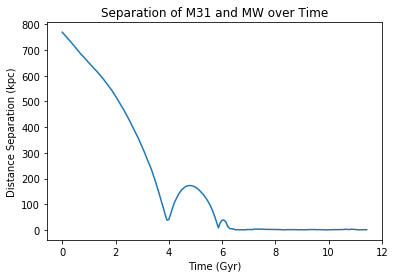

In [13]:
#plot the magnitude of separation between MW and M31 as a function of time
plt.plot(MWtime, MagDistdiff)
plt.xlabel("Time (Gyr)")
plt.ylabel("Distance Separation (kpc)")
plt.title("Separation of M31 and MW over Time")

Text(0.5,1,'Separation of M33 and M31 over Time')

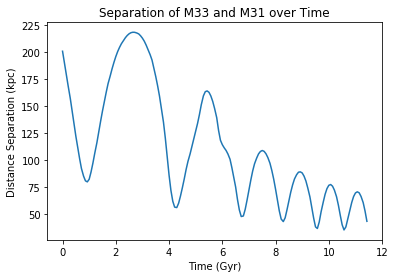

In [15]:
#plot the magnitude of separation between M33 and M31 as a function of time
plt.plot(M33time, MagDistdiff2)
plt.xlabel("Time (Gyr)")
plt.ylabel("Distance Separation (kpc)")
plt.title("Separation of M33 and M31 over Time")

Text(0.5,1,'Relative Velocity of M31 and MW over Time')

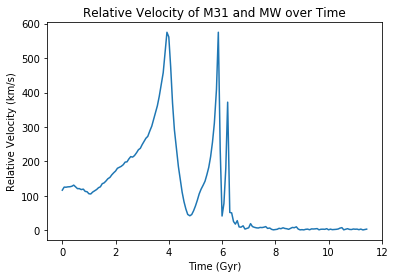

In [16]:
#plot the relative velocity between MW and M31 time
plt.plot(MWtime, MagVeldiff)
plt.xlabel("Time (Gyr)")
plt.ylabel("Relative Velocity (km/s)")
plt.title("Relative Velocity of M31 and MW over Time")

Text(0.5,1,'Relative Velocity of M31 and M33 over Time')

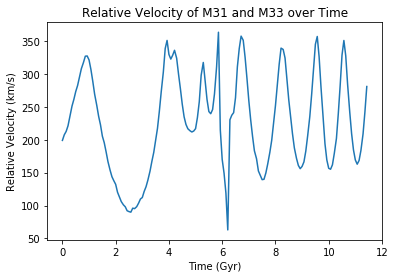

In [17]:
#plot the relative velocity between M33 and M31 over time
plt.plot(M33time, MagVeldiff2)
plt.xlabel("Time (Gyr)")
plt.ylabel("Relative Velocity (km/s)")
plt.title("Relative Velocity of M31 and M33 over Time")

# Questions

#### How many close encounters will the MW and M31 experience in the future?
M31 and the Milky Way will have 3 close encounters, one around 4 Gyrs, one just before 6 Gyrs, and the final one just after 6 Gyrs where the remain quite close from then on.  I can tell this by the dips in the curve of separation over time.


#### How is the time evolution of the separation and relative velocity related?
The relative velocity of the 2 interacting galaxies peaks when their relative separations dip towards 0.  This means that the two galaxies are moving the fastest towards each other when they are coming closer together.

#### When do M31 and the MW merge? What happens to M33's orbit when they merge?

M31 and the Milky Way merge at ~6.5 Gyr.  M33 is pulled much closer in after the merge, i.e. its apocenter is much smaller before the merge and then decreases over time.